# Lecture 4 - Working with Timeseries and Dates in Pandas<a name="_working with timeseries and dates in pandas"></a>

## Time Series
A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. Examples of time series are heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average.



## Working with date and time 
To work with date and time, in Python, the `datetime` module supplies classes for manipulating dates and times in both simple and complex ways. 

To use functions from datetime module you need to use `dt.function`.

## Using date as an index
When we read the data, we can specify the column to use as an index. Here we choose the column date as an index column by specifying `index_col="Date"` and `parse_dates = TRUE`.

Note:
`parse_dates` : bool (True or False) or list of int or names or list of lists or dict, default False
- The behavior is as follows:
 - boolean. If True -> try parsing the index.
 - list of int or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3 each as a separate date column.
 - list of lists. e.g. If [[1, 3]] -> combine columns 1 and 3 and parse as a single date column.
 - dict, e.g. {‘foo’ : [1, 3]} -> parse columns 1, 3 as date and call result ‘foo’


Usefull funtions to access the date:
- data.index.day : get the number of the day of the week corresponding to the date in question (1 to 31)
- data.index.weekday
- data.index.date
- data.index.weekday_name
- data.dtypes
- data slicing: data['date1':'date2']
- data.loc['part_of_date'] or data['part_of_date'] we call this partial indexing. Use strings to partially match against the index.  See more docs here: 1st semester - 30 credits ECTS
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#datetimeindex-partial-string-indexing



## Resampling
data.resample: You can resample indices https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

Syntax : `DataFrame.resample(rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention=’start’, kind=None, loffset=None, limit=None, base=0, on=None, level=None`).fun()

Parameters : 
- rule : string that contains rule aliases and/or numerics. This is the core of resampling. The string you input here determines by what interval the data will be resampled by, as denoted by the bold part in the following line:
data.resample('**2min**').sum()

As you can see, you can throw in floats or integers before the string to change the frequency. You can even throw multiple float/string pairs together for a very specific timeframe! For example:

'3min' or '3T' = 3 minutes

'SMS' = Two times a month

'1D3H.5min20S' = One Day, 3 hours, .5min(30sec) + 20sec

To save you the pain of trying to look up the resample strings, I’ve posted the table below:

![Resample](img/table_sampling.png)



- closed : {‘right’, ‘left’}
The closed argument tells which side is included, ‘closed’ being the included side (implying the other side is not included) in the calculation for each time interval.
The default is ‘left’. For all frequency offsets except for ‘M’, ‘A’, ‘Q’, ‘BM’,‘BA’, ‘BQ’, and ‘W’ which all have a default of ‘right’.


- label : {‘right’, ‘left’}

This argument does not change the underlying calculation, it just relabels the output based on the desired edge once the aggregation is performed.

The default is ‘left’ for all frequency offsets except for ‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’ which all have a default of ‘right’.

- convention : For PeriodIndex only, controls whether to use the start or end of rule

- loffset : Adjust the resampled time labels

Instead of changing any of the calculations, it just bumps the labels over by the specified amount of time.

- base :  
Shifts the base time to calculate from by some time amount. This function moves the ‘origin’.
For example, for ‘5min’ frequency, base could range from 0 through 4. Defaults to 0.

- axis, on, level: 

These arguments specify what column name or index to base your resampling on.

If your data has the date along the columns instead of down the rows, specify `axis = 1` 

If your date column is not the index, specify that column name using:

`on = 'date_column_name`

if you have a multi-level indexed dataframe, use level to specify what level the correct datetime index to resample is.

- level : For a MultiIndex, level (name or number) to use for resampling. Level must be datetime-like.


Resampling generates a unique sampling distribution on the basis of the actual data. We can apply various frequency to resample our time series data. This is a very important technique in the field of analytics.
Most commonly used time series frequency are –
 - W : weekly frequency
 - M : month end frequency
 - SM : semi-month end frequency (15th and end of month)
 - Q : quarter end frequency

Ex. data.resample('nM').mean()



In [18]:
# Import pandas library 
import pandas as pd 
import datetime


# initialize list of lists 
data = [['2000-01-01 00:00:00', 0], ['2000-01-01 00:01:00', 2], ['2000-01-01 00:02:00', 4],
        ['2000-01-01 00:03:00', 6],['2000-01-01 00:04:00', 8],['2000-01-01 00:05:00', 10],
        ['2000-01-01 00:06:00', 12], ['2000-01-01 00:07:00', 14], ['2000-01-01 00:07:00', 16]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Date', 'Value']) 
  
# print dataframe. 
df 



,Date,Value
0,2000-01-01 00:00:00,0
1,2000-01-01 00:01:00,2
2,2000-01-01 00:02:00,4
3,2000-01-01 00:03:00,6
4,2000-01-01 00:04:00,8
5,2000-01-01 00:05:00,10
6,2000-01-01 00:06:00,12
7,2000-01-01 00:07:00,14
8,2000-01-01 00:07:00,16


In [19]:
df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m-%d %H:%M:%S")
df = df.set_index('Date')
df

,Value
Date,
2000-01-01 00:00:00,0
2000-01-01 00:01:00,2
2000-01-01 00:02:00,4
2000-01-01 00:03:00,6
2000-01-01 00:04:00,8
2000-01-01 00:05:00,10
2000-01-01 00:06:00,12
2000-01-01 00:07:00,14
2000-01-01 00:07:00,16


In [20]:
df.resample('2min').sum()

,Value
Date,
2000-01-01 00:00:00,2
2000-01-01 00:02:00,10
2000-01-01 00:04:00,18
2000-01-01 00:06:00,42


In [21]:
df

,Value
Date,
2000-01-01 00:00:00,0
2000-01-01 00:01:00,2
2000-01-01 00:02:00,4
2000-01-01 00:03:00,6
2000-01-01 00:04:00,8
2000-01-01 00:05:00,10
2000-01-01 00:06:00,12
2000-01-01 00:07:00,14
2000-01-01 00:07:00,16


In [16]:
df.resample('1min').sum()

,Value
Date,
1999-12-31 23:59:00,0
2000-01-01 00:00:00,2
2000-01-01 00:01:00,6
2000-01-01 00:02:00,10
2000-01-01 00:03:00,14
2000-01-01 00:04:00,18
2000-01-01 00:05:00,22
2000-01-01 00:06:00,42


In [7]:
df

,Value
Date,
2000-01-01 00:00:00,0
2000-01-01 00:01:00,2
2000-01-01 00:02:00,4
2000-01-01 00:03:00,6
2000-01-01 00:04:00,8
2000-01-01 00:05:00,10
2000-01-01 00:06:00,12
2000-01-01 00:07:00,14
2000-01-01 00:07:00,16


In [4]:
df.resample('2min',closed='right').sum()

,Value
Date,
1999-12-31 23:58:00,0
2000-01-01 00:00:00,6
2000-01-01 00:02:00,14
2000-01-01 00:04:00,22
2000-01-01 00:06:00,30


In [8]:
df

,Value
Date,
2000-01-01 00:00:00,0
2000-01-01 00:01:00,2
2000-01-01 00:02:00,4
2000-01-01 00:03:00,6
2000-01-01 00:04:00,8
2000-01-01 00:05:00,10
2000-01-01 00:06:00,12
2000-01-01 00:07:00,14
2000-01-01 00:07:00,16


In [5]:
df.resample('2min',label='left').sum()

,Value
Date,
2000-01-01 00:00:00,2
2000-01-01 00:02:00,10
2000-01-01 00:04:00,18
2000-01-01 00:06:00,42


In [6]:
df.resample('2min',label='right').sum()

,Value
Date,
2000-01-01 00:02:00,2
2000-01-01 00:04:00,10
2000-01-01 00:06:00,18
2000-01-01 00:08:00,42


In [7]:
df.resample('2min',loffset='2T').sum()

,Value
Date,
2000-01-01 00:02:00,2
2000-01-01 00:04:00,10
2000-01-01 00:06:00,18
2000-01-01 00:08:00,42


In [9]:
df.resample('2min').sum()

,Value
Date,
2000-01-01 00:00:00,2
2000-01-01 00:02:00,10
2000-01-01 00:04:00,18
2000-01-01 00:06:00,42


In [11]:
df.resample('2min',loffset='4T').sum()

,Value
Date,
2000-01-01 00:04:00,2
2000-01-01 00:06:00,10
2000-01-01 00:08:00,18
2000-01-01 00:10:00,42


In [9]:
df

,Value
Date,
2000-01-01 00:00:00,0
2000-01-01 00:01:00,2
2000-01-01 00:02:00,4
2000-01-01 00:03:00,6
2000-01-01 00:04:00,8
2000-01-01 00:05:00,10
2000-01-01 00:06:00,12
2000-01-01 00:07:00,14
2000-01-01 00:07:00,16


In [14]:
df=df.resample('30S',base=15).sum()
df

,Value
Date,
1999-12-31 23:59:45,0
2000-01-01 00:00:15,0
2000-01-01 00:00:45,2
2000-01-01 00:01:15,0
2000-01-01 00:01:45,4
2000-01-01 00:02:15,0
2000-01-01 00:02:45,6
2000-01-01 00:03:15,0
2000-01-01 00:03:45,8


In [15]:
df['Value'] = df['Value'].replace(to_replace=0, method='ffill')
df

,Value
Date,
1999-12-31 23:59:45,0
2000-01-01 00:00:15,0
2000-01-01 00:00:45,2
2000-01-01 00:01:15,2
2000-01-01 00:01:45,4
2000-01-01 00:02:15,4
2000-01-01 00:02:45,6
2000-01-01 00:03:15,6
2000-01-01 00:03:45,8


## Rolling windows
Suppose you want to smooth out a noisy timeseries plot. You can set a window size over which to smooth, and a function like mean, to calculate over that window.  This is also quite similar to resample.  Usually you can use that.
Example: this is a 30 day window.

`data['column'].rolling(window=nb).mean()`

## Date Conversions and Formatting


Sometimes we have specific date formats in our data. So we need to specify the date format when we read the file.

We have to tell the to_datetime function how to read the string.

Example: if your date is in this format: 2019-06-03 14-35 

The format should be speficified as:

`data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m-%d %H-%M")`

## Excellent resources: 

* pandas docs on timeseries /date functionality: http://pandas.pydata.org/pandas-docs/stable/timeseries.html 
    
* financial data in detail: http://nbviewer.jupyter.org/github/changhiskhan/talks/blob/master/pydata2012/pandas_timeseries.ipynb
       

# Inclass exercises

## A DateTime Index column<a name="_a datetime index column"></a>

### Import all the necessary libraries as we did in the last sessions, in addition to the `datetime` library

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import datetime



We will work with goog.csv data that contains stock market data.
### Load the goog.csv 


In [7]:
goog = pd.read_csv("data/goog.csv", index_col="Date", parse_dates=True)
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN


Now since we have specified the dates column to be the index of our data. 
### Try `data.index`. What does it give?

In [8]:
goog.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2014-12-17', '2014-12-18', '2014-12-19', '2014-12-22',
               '2014-12-23', '2014-12-24', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

### Now try `.day`, `.date` `.weekday`,  `.weekday_name` , and `.month`. What do you obtain?

In [9]:
goog.index.day

Int64Index([ 4,  5,  6,  7,  8, 11, 12, 13, 14, 15,
            ...
            17, 18, 19, 22, 23, 24, 26, 29, 30, 31],
           dtype='int64', name='Date', length=1257)

In [10]:
goog.index.day_name() # older version
#goog.index.weekday_name

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday',
       'Friday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object', name='Date', length=1257)

In [11]:
goog.index.weekday_name

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday',
       'Friday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object', name='Date', length=1257)

The days of the week start with 0 for Monday.

In [12]:
goog.index.date

array([datetime.date(2010, 1, 4), datetime.date(2010, 1, 5),
       datetime.date(2010, 1, 6), ..., datetime.date(2014, 12, 29),
       datetime.date(2014, 12, 30), datetime.date(2014, 12, 31)],
      dtype=object)

In [13]:
goog.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=1257)

### Add the day of the week to the dataframe:

In [14]:
goog['Weekday'] = goog.index.weekday

In [15]:
goog.head()

,Open,High,Low,Close,Volume,Weekday
Date,,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN,0
2010-01-05,313.28,313.61,310.46,311.68,NaN,1
2010-01-06,312.62,312.62,302.88,303.83,NaN,2
2010-01-07,304.40,304.70,296.03,296.75,NaN,3
2010-01-08,295.70,301.32,294.26,300.71,NaN,4


## A non-index DateTime column<a name="_a non-index datetime column"></a>
Now lets explore how we could deal with DataTime column without considering it as an index.

### Duplicate the index column as a regular column, so you see how that works.

In [16]:
goog['date copy'] = goog.index

In [17]:
goog.head()

,Open,High,Low,Close,Volume,Weekday,date copy
Date,,,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN,0,2010-01-04
2010-01-05,313.28,313.61,310.46,311.68,NaN,1,2010-01-05
2010-01-06,312.62,312.62,302.88,303.83,NaN,2,2010-01-06
2010-01-07,304.40,304.70,296.03,296.75,NaN,3,2010-01-07
2010-01-08,295.70,301.32,294.26,300.71,NaN,4,2010-01-08


### Find the types of each column of the data

In [18]:
goog.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
Weekday               int64
date copy    datetime64[ns]
dtype: object

### Apply the weekday names of the  date column you added

In [1]:
# Like str -- you need .dt if you're not dealing with an index datetime obj
goog['date copy'].dt.day_name().head()

NameError: name 'goog' is not defined

For all the time-date components you can access, here is the doc: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components

## Practice with Groupby, using datetimes<a name="_practice with groupby, using datetimes"></a>

###   Group the `High` column by months, aggregate by average and plot:


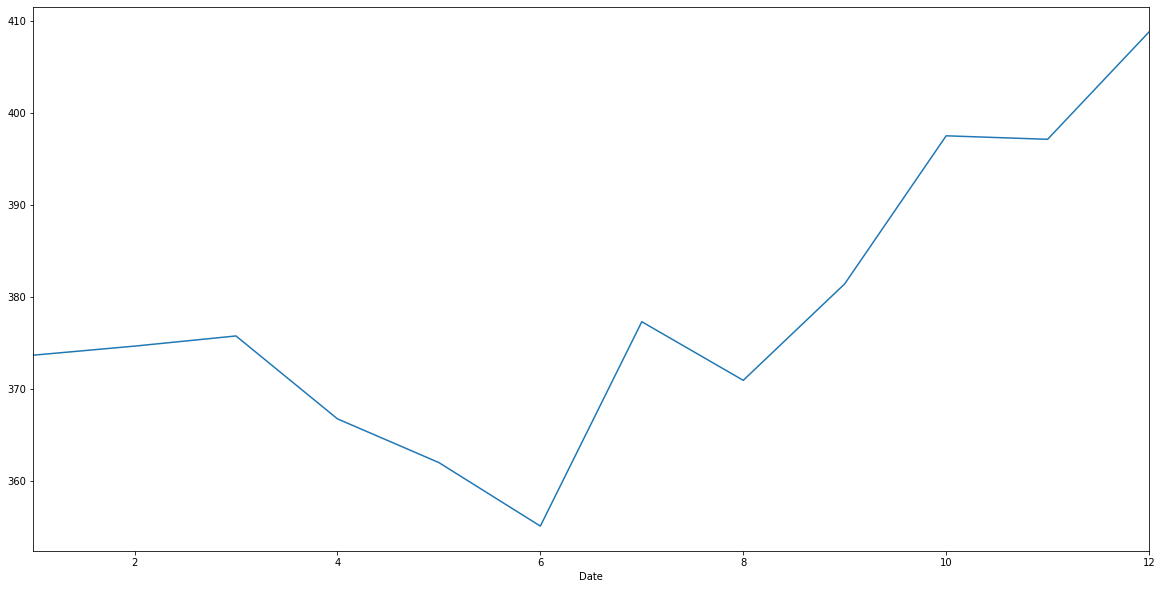

In [31]:
goog.groupby(goog.index.month).aggregate(np.mean)['High'].plot(figsize = (20,10))

## Partial String Indexing for Dates<a name="_partial string indexing for dates"></a>

### Find all data of  January 2012

In [32]:
goog.loc['2012-01']  # or shorthand goog['2012-01']

,Open,High,Low,Close,Volume,Weekday,date copy
Date,,,,,,,
2012-01-03,326.14,333.74,325.86,332.37,NaN,1,2012-01-03
2012-01-04,332.18,334.79,329.98,333.81,NaN,2,2012-01-04
2012-01-05,330.73,331.65,327.79,329.18,NaN,3,2012-01-05
2012-01-06,329.25,329.67,324.57,324.68,NaN,4,2012-01-06
2012-01-09,322.93,323.18,310.30,310.92,NaN,0,2012-01-09
2012-01-10,314.56,316.58,308.15,311.26,NaN,1,2012-01-10
2012-01-11,311.44,314.38,310.25,312.67,NaN,2,2012-01-11
2012-01-12,315.29,316.13,312.94,314.51,NaN,3,2012-01-12
2012-01-13,312.82,313.16,310.22,312.18,NaN,4,2012-01-13


The max time is known to be 2 April 2014.
### Slice a part of the data around the max time.

In [35]:
goog['2014-03-25':'2014-04-10']

,Open,High,Low,Close,Volume,Weekday,date copy
Date,,,,,,,
2014-03-25,582.42,584.34,572.93,578.78,NaN,1,2014-03-25
2014-03-26,580.42,585.20,565.18,565.42,NaN,2,2014-03-26
2014-03-27,564.86,565.40,550.50,556.58,3826676.0,3,2014-03-27
2014-03-28,558.94,566.03,558.33,559.51,2258918.0,4,2014-03-28
2014-03-31,564.63,566.93,555.87,556.70,1942277.0,0,2014-03-31
2014-04-01,559.57,568.18,558.44,566.88,2182626.0,1,2014-04-01
2014-04-02,282.43,571.83,561.44,566.98,2088804.0,2,2014-04-02
2014-04-03,569.85,587.28,564.13,569.74,5087530.0,3,2014-04-03
2014-04-04,574.65,577.77,543.00,543.14,6377658.0,4,2014-04-04


### Plot all the `High` values in this range:

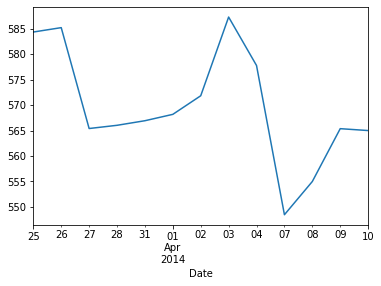

In [36]:
goog['2014-03-25':'2014-04-10']['High'].plot()

## Resampling


### Resample the data by 1 month then by 2 months by averaging over the months.

In [21]:
goog.resample('1M')#.mean().head()

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

In [44]:
goog.resample('2M').mean().head() 

,Open,High,Low,Close,Volume,Weekday
Date,,,,,,
2010-01-31,290.765789,292.974211,285.837895,289.011053,NaN,2.105263
2010-03-31,274.002143,276.576429,271.920714,274.328810,NaN,1.976190
2010-05-31,264.230750,266.747250,260.298500,263.188000,NaN,2.000000
2010-07-31,239.450000,242.088605,236.509535,239.186047,NaN,2.093023
2010-09-30,242.885581,245.166977,240.957209,243.129070,NaN,2.000000


In [25]:
goog

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN
2010-01-11,301.93,301.93,296.72,300.25,NaN
2010-01-12,298.74,298.78,293.71,294.94,NaN
2010-01-13,287.96,293.90,286.66,293.25,NaN
2010-01-14,291.66,296.80,291.11,294.63,NaN


### How does this affect the second row in the table?

In [47]:
# Write your response here 




## Using Rolling Windows<a name="_using rolling windows"></a>

### Plot the High column from our data.

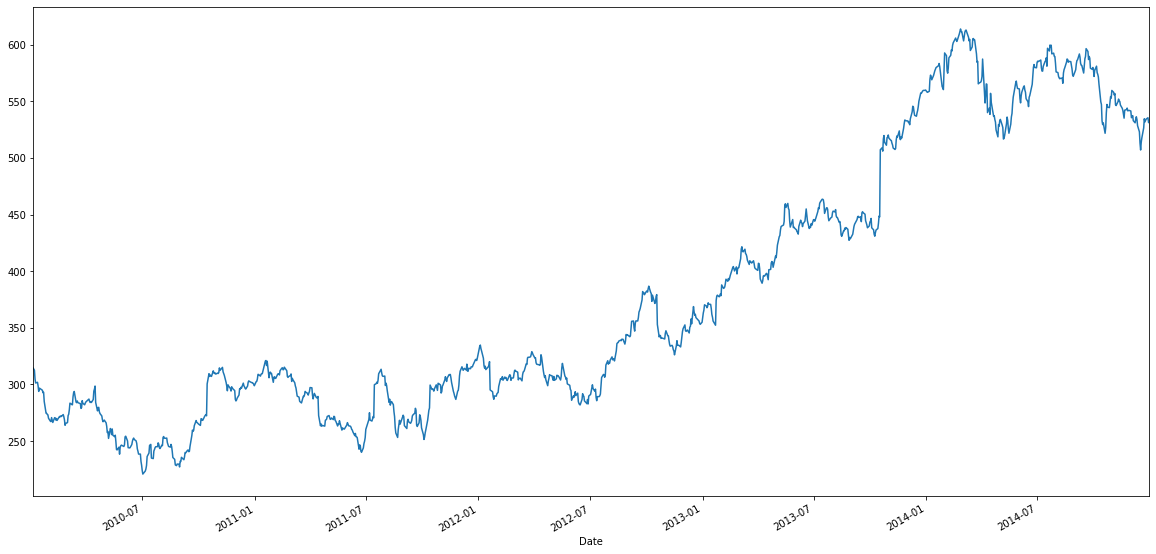

In [48]:
goog['High'].plot(figsize=(20,10))

### What do you notice?

In [ ]:
# Write your answer here 

### Smooth the High column by applying a 30 day rolling window.

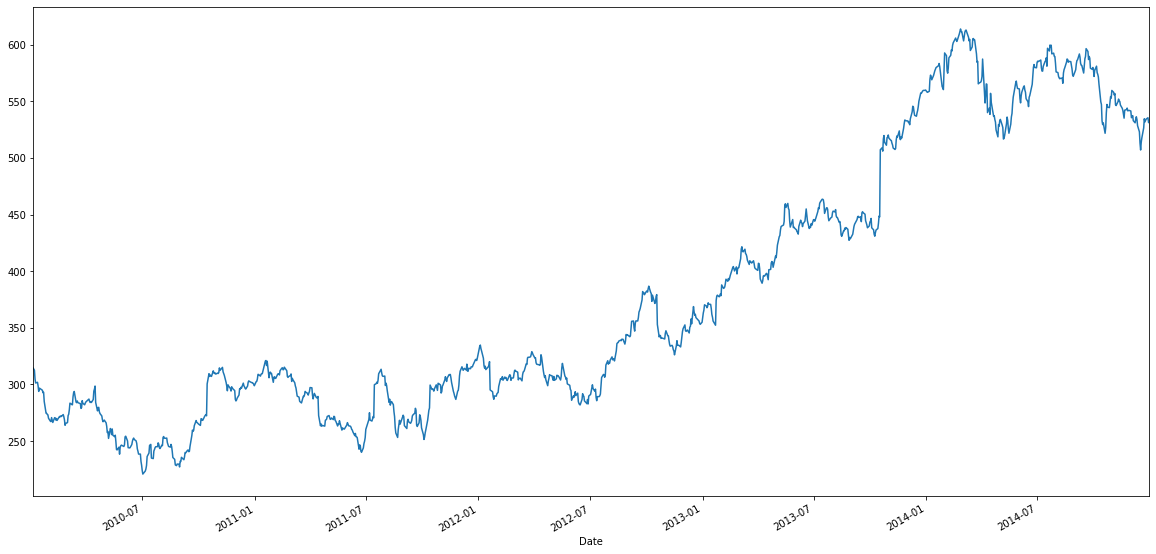

In [28]:
goog['High'].rolling(window='1D').mean().plot(figsize=(20,10))

### Vary the window size. What do you notice?  

In [53]:
#YOUR CODE HERE 
# your response



## Date Conversions and Formatting<a name="_date conversions and formatting"></a>

I downloaded this data from here: http://www.nasdaq.com/symbol/aapl/interactive-chart?timeframe=5d

In [54]:
apple = pd.read_csv("data/apple_jan2017.csv")

In [55]:
apple.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-23 09-30,119.93,119.93,119.93,119.93,148142.0
1,2017-01-23 09-31,120.23,120.23,120.23,120.23,1039374.0
2,2017-01-23 09-32,120.18,120.18,120.18,120.18,250078.0
3,2017-01-23 09-33,120.27,120.27,120.27,120.27,206714.0
4,2017-01-23 09-34,120.38,120.38,120.38,120.38,246886.0


In [31]:
# there's an error at the end... we don't want this row!
apple.tail()

,Date,Open,High,Low,Close,Volume
2090,2017-01-27 19-49,121.49,121.49,121.49,121.49,28.0
2091,2017-01-27 19-53,121.48,121.48,121.48,121.48,876.0
2092,2017-01-27 19-56,121.42,121.42,121.42,121.42,976.0
2093,2017-01-27 19-59,121.55,121.55,121.55,121.55,200.0
2094,This document was made with Webix library. htt...,NaN,NaN,NaN,NaN,NaN


In [32]:
apple = apple.drop(2094)

In [33]:
apple.tail()

,Date,Open,High,Low,Close,Volume
2089,2017-01-27 19-46,121.40,121.40,121.40,121.40,708.0
2090,2017-01-27 19-49,121.49,121.49,121.49,121.49,28.0
2091,2017-01-27 19-53,121.48,121.48,121.48,121.48,876.0
2092,2017-01-27 19-56,121.42,121.42,121.42,121.42,976.0
2093,2017-01-27 19-59,121.55,121.55,121.55,121.55,200.0


### Notice the format of the date. Write the format that allows you to read it.

YOUR RESPONSE HERE

In [34]:
apple.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

### Convert the Date column to datetime format. Specity the format you wrote above.

In [1]:
# We have to tell the datetime function how to read the string:
apple['Date'] = pd.to_datetime(apple['Date'],format="%Y-%m-%d %H-%M")

NameError: name 'pd' is not defined

In [36]:
apple.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [29]:
apple['Date'].head()

0   2017-01-23 09:30:00
1   2017-01-23 09:31:00
2   2017-01-23 09:32:00
3   2017-01-23 09:33:00
4   2017-01-23 09:34:00
Name: Date, dtype: datetime64[ns]

Some info on datetime formats is here: https://docs.python.org/3/library/datetime.html

In [37]:
apple = apple.set_index('Date')

In [38]:
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-23 09:30:00,119.93,119.93,119.93,119.93,148142.0
2017-01-23 09:31:00,120.23,120.23,120.23,120.23,1039374.0
2017-01-23 09:32:00,120.18,120.18,120.18,120.18,250078.0
2017-01-23 09:33:00,120.27,120.27,120.27,120.27,206714.0
2017-01-23 09:34:00,120.38,120.38,120.38,120.38,246886.0


We can "resample" the data by a time window, and create new time labels if we want.  This acts like a groupby, and uses a mean of the window of 60 minutes.  Why do you think there are NaNs there?

In [2]:
highs = apple['High'].resample("60Min", label="right").mean() 
highs.plot(figsize=(20,10))

NameError: name 'apple' is not defined

### Drop Nans and Plot

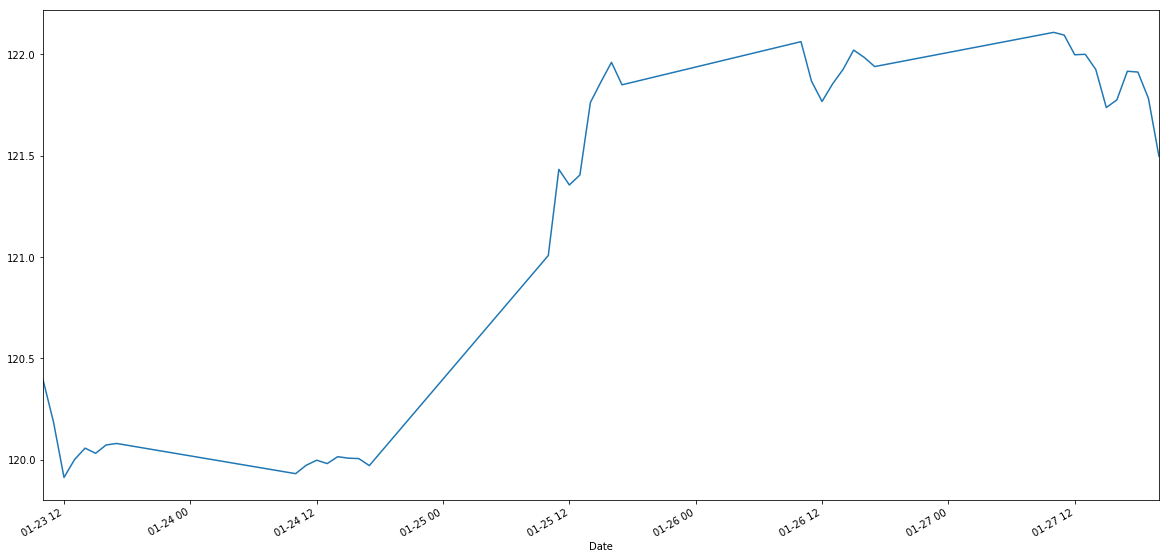

In [40]:
#drop NaNs
highs.dropna().plot(figsize = (20,10))